# Centuries of Virat Kohli

The provided dataset contains the information for various centuries of famous Indian cricketer VIRAT KOHLI.

Write complete machine learning code to predict Result   including EDA.  Also write the code  to avoid overfitting/underfitting, with best hyperparameter tuning and save the model in the end

In [328]:
# importing required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [329]:
# Importing dataset

virat = pd.read_csv("71 Centuries of Virat Kohli.csv",skipinitialspace = True)
virat.head()

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Venue,Column1,H/A,Date,Result,Format,Man of the Match,Captain,Unnamed: 14
0,116,Out,Australia,6,2,NaN,Adelaide Oval,Adelaide,Away,24-01-2012,Lost,Test,No,No,NaN
1,103,Out,New Zealand,5,2,NaN,M. Chinnaswamy Stadium,Bangalore,Home,31-08-2012,Won,Test,Yes,No,NaN
2,103,Out,England,5,2,NaN,Vidarbha Cricket Association Stadium,Nagpur,Home,13-12-2012,Drawn,Test,No,No,NaN
3,107,Out,Australia,5,2,NaN,M. A. Chidambaram Stadium,Chennai,Home,22-02-2013,Won,Test,No,No,NaN
4,119,Out,South Africa,4,1,NaN,Wanderers Stadium,Johannesburg,Away,18-12-2013,Drawn,Test,No,No,NaN


# Exploratory Data Analysis (EDA)

In [330]:
# Checking the shape

virat.shape

(71, 15)

In [331]:
# Checking for null values

virat.isnull().sum()

Score                0
Out/Not Out          0
Against              0
Batting Order        0
Inn.                 0
Strike Rate         27
Venue                0
Column1              0
H/A                  0
Date                 0
Result               0
Format               0
Man of the Match     0
Captain              0
Unnamed: 14         71
dtype: int64

In [332]:
# Checking the information of the dataset

virat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Score             71 non-null     int64  
 1   Out/Not Out       71 non-null     object 
 2   Against           71 non-null     object 
 3   Batting Order     71 non-null     int64  
 4   Inn.              71 non-null     int64  
 5   Strike Rate       44 non-null     float64
 6   Venue             71 non-null     object 
 7   Column1           71 non-null     object 
 8   H/A               71 non-null     object 
 9   Date              71 non-null     object 
 10  Result            71 non-null     object 
 11  Format            71 non-null     object 
 12  Man of the Match  71 non-null     object 
 13  Captain           71 non-null     object 
 14  Unnamed: 14       0 non-null      float64
dtypes: float64(2), int64(3), object(10)
memory usage: 8.4+ KB


In [333]:
# Checking the missing ratio of the dataset 

missing_ratio = virat.isnull().sum() / len(virat) * 100
missing_ratio.sort_values(ascending=False)

Unnamed: 14         100.000000
Strike Rate          38.028169
Score                 0.000000
Out/Not Out           0.000000
Against               0.000000
Batting Order         0.000000
Inn.                  0.000000
Venue                 0.000000
Column1               0.000000
H/A                   0.000000
Date                  0.000000
Result                0.000000
Format                0.000000
Man of the Match      0.000000
Captain               0.000000
dtype: float64

In [334]:
# Checking on the unique values present in the dataset

virat.nunique()

Score               48
Out/Not Out          2
Against             10
Batting Order        5
Inn.                 4
Strike Rate         44
Venue               45
Column1             42
H/A                  2
Date                70
Result               6
Format               3
Man of the Match     2
Captain              2
Unnamed: 14          0
dtype: int64

In [335]:
# Renaming Column1

virat['City'] = virat["Column1"]
virat.drop(['Column1'],axis=1,inplace=True)

In [336]:
# Checking the count of values present in the dataset

for i in virat.columns:
    print(virat[i].value_counts())
    print("*"*75)

107    5
103    5
115    3
123    3
116    2
104    2
117    2
112    2
100    2
102    2
136    2
139    2
122    2
106    2
105    2
131    1
183    1
110    1
154    1
138    1
121    1
113    1
127    1
160    1
129    1
140    1
157    1
120    1
128    1
111    1
118    1
108    1
167    1
119    1
141    1
169    1
147    1
200    1
211    1
235    1
133    1
204    1
213    1
243    1
153    1
149    1
254    1
114    1
Name: Score, dtype: int64
***************************************************************************
Out        51
Not Out    20
Name: Out/Not Out, dtype: int64
***************************************************************************
Australia       15
Sri Lanka       13
West Indies     11
New Zealand      8
England          8
South Africa     7
Bangladesh       5
Pakistan         2
Zimbabwe         1
Afganistan       1
Name: Against, dtype: int64
***************************************************************************
3    36
4    30
5     3
6     1
1   

In [337]:
# Dropping columns Sno and Popularity

virat.drop(['Unnamed: 14'],axis=1,inplace=True)
virat.shape

(71, 14)

In [338]:
# Splitting the dataset into Categorical and Numerical for Visualization

virat_cat = []
for i in virat.columns:
    if virat.dtypes[i]=='object':
        virat_cat.append(i)
        
virat_num = []
for i in virat.columns:
    if virat.dtypes[i]!='object':
        virat_num.append(i)
print('Categorical Column',virat_cat)
print('Numerical Column',virat_num)

Categorical Column ['Out/Not Out', 'Against', 'Venue', 'H/A', 'Date', 'Result', 'Format', 'Man of the Match', 'Captain', 'City']
Numerical Column ['Score', 'Batting Order', 'Inn.', 'Strike Rate']


<Axes: >

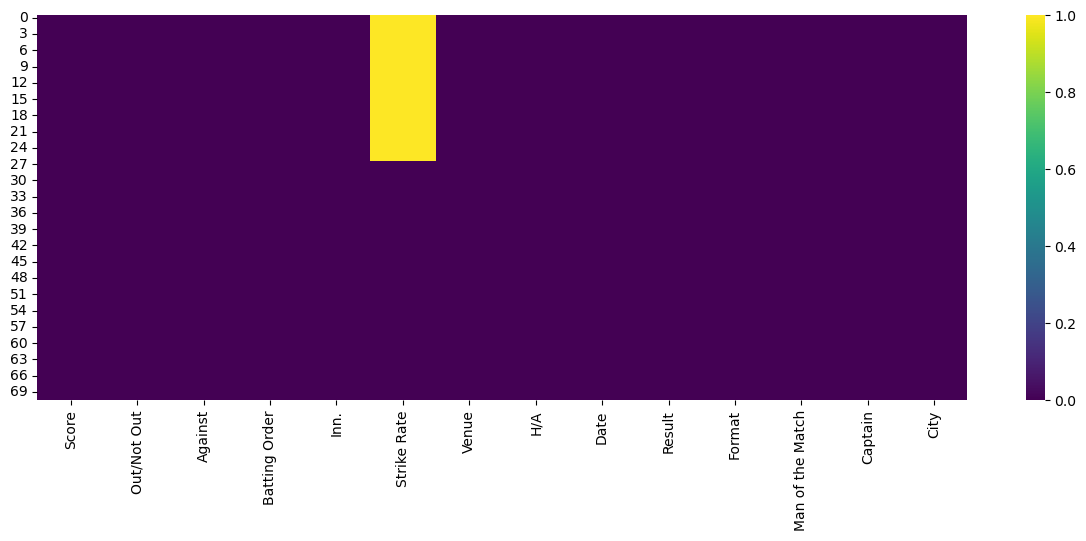

In [339]:
# Visualizing the dataset in heatmap for null values

plt.figure(figsize=(15,5))
sns.heatmap(virat.isnull(),cmap='viridis')

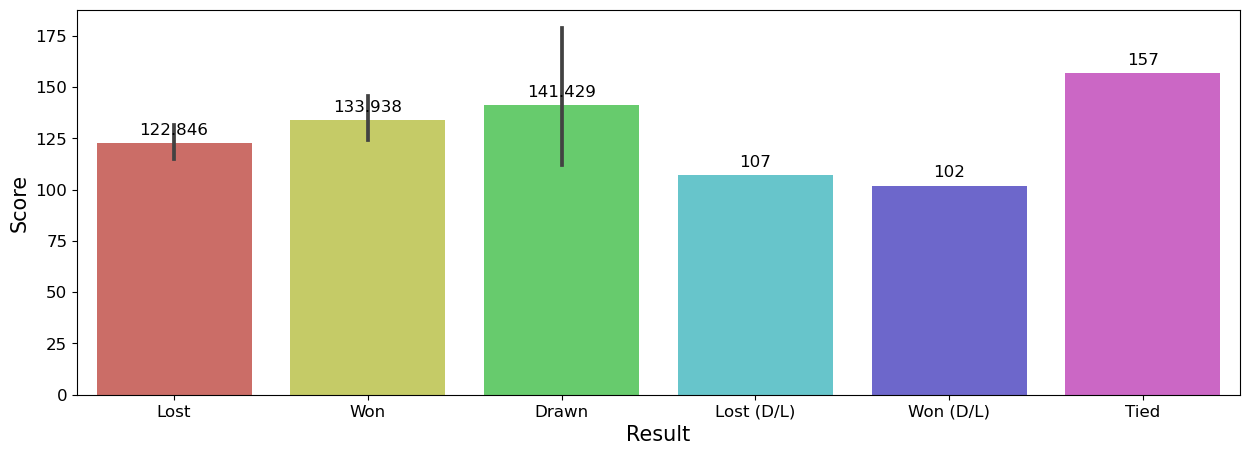

In [340]:
# Visualizing Score Vs Result

plt.figure(figsize=(15,5))
cat=sns.barplot(data=virat, x='Result',y='Score',palette='hls')
plt.xlabel("Result",fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=4)
plt.show()

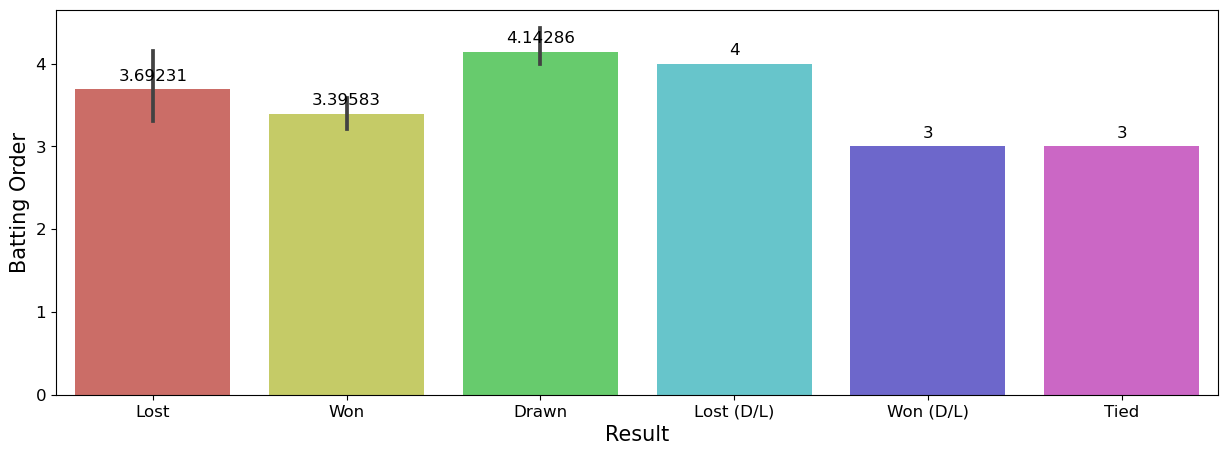

In [341]:
# Visualizing Batting Order Out Vs Result

plt.figure(figsize=(15,5))
cat=sns.barplot(data=virat, x='Result',y='Batting Order',palette='hls')
plt.xlabel("Result",fontsize=15)
plt.ylabel("Batting Order",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=4)
plt.show()

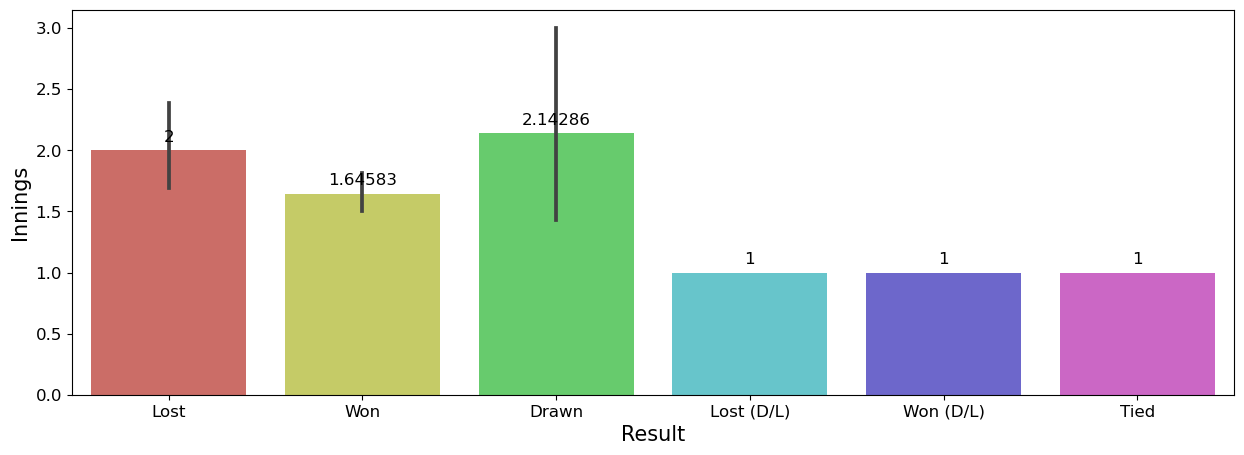

In [342]:
# Visualizing Innings Out Vs Result

plt.figure(figsize=(15,5))
cat=sns.barplot(data=virat, x='Result',y='Inn.',palette='hls')
plt.xlabel("Result",fontsize=15)
plt.ylabel("Innings",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=4)
plt.show()

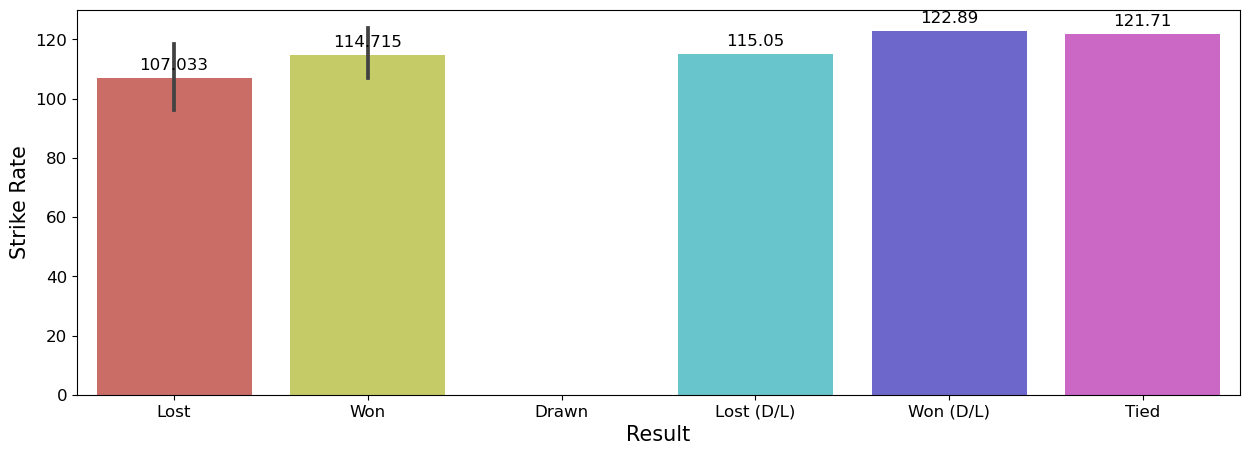

In [343]:
# Visualizing Strike Rate Out Vs Result

plt.figure(figsize=(15,5))
cat=sns.barplot(data=virat, x='Result',y='Strike Rate',palette='hls')
plt.xlabel("Result",fontsize=15)
plt.ylabel("Strike Rate",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=4)
plt.show()

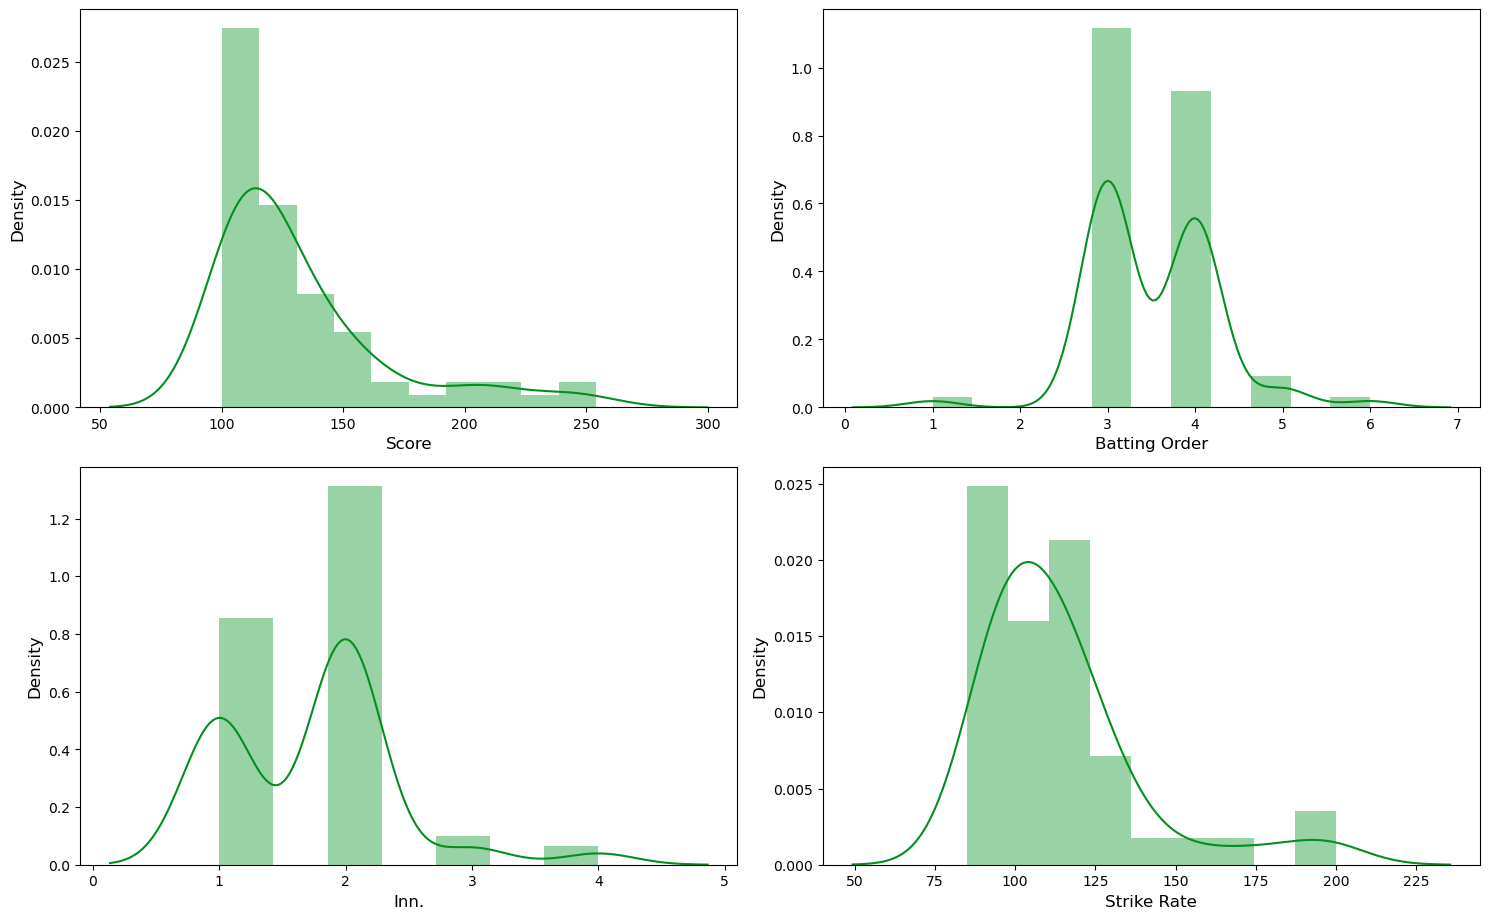

In [344]:
# Visualizing the dataset with distribution plot to check the distribution

plt.figure(figsize=(15,18))
plot_number=1
for i in virat_num:
    if plot_number <=6:
        ax=plt.subplot(4,2,plot_number)
        sns.distplot(virat[i],color="#028f1e")
        plt.xlabel(i,fontsize=12)
        plt.ylabel('Density',fontsize=12)
        plot_number+=1
plt.tight_layout()

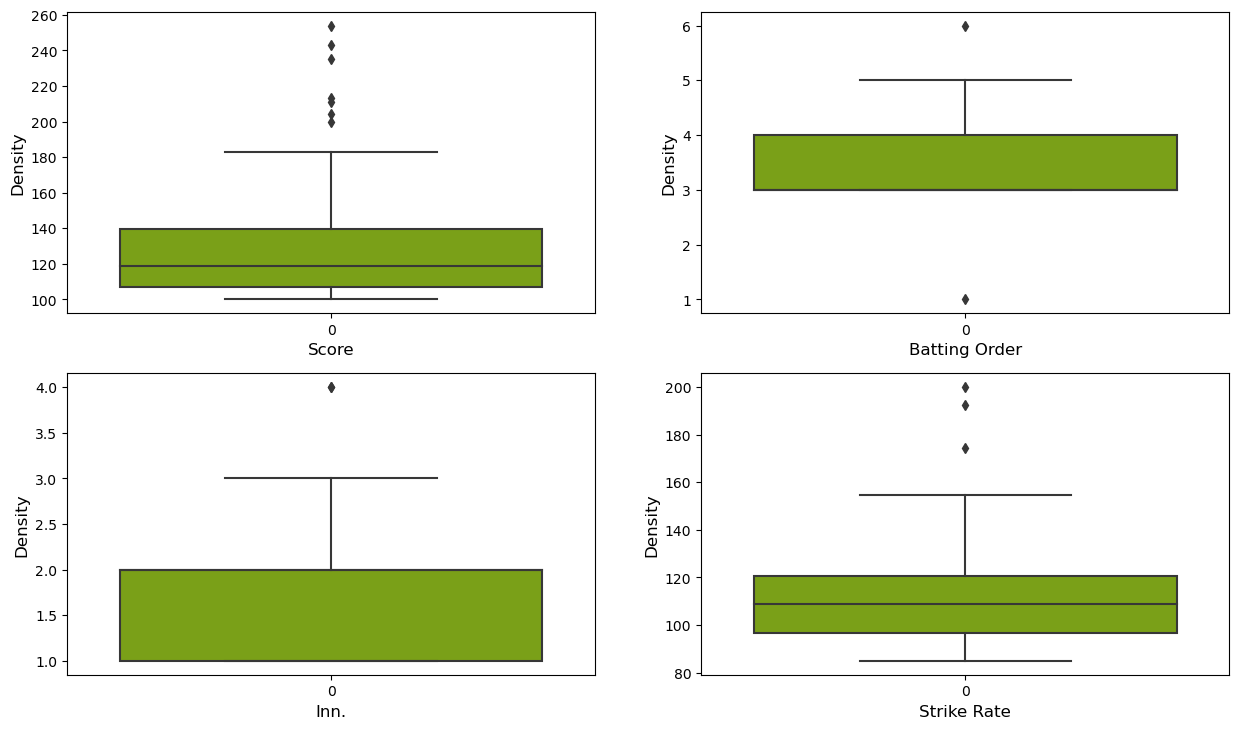

In [345]:
# Checking outliers with boxplot

plt.figure(figsize=(15,18))
plot_number=1
for i in virat_num:
    if plot_number <=6:
        ax=plt.subplot(4,2,plot_number)
        sns.boxplot( virat[i],color='#84b701')
        plt.xlabel(i,fontsize=12)
        plt.ylabel('Density',fontsize=12)
    plot_number+=1
plt.show()

# Data Feature Selection and Engineering

In [346]:
# Replacing Null values for Metascore with Mean

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.NaN, strategy = "mean")
virat['Strike Rate'] = imp.fit_transform(virat['Strike Rate'].values.reshape(-1,1))

In [347]:
# Checking the dataset for null values

virat.isnull().sum()

Score               0
Out/Not Out         0
Against             0
Batting Order       0
Inn.                0
Strike Rate         0
Venue               0
H/A                 0
Date                0
Result              0
Format              0
Man of the Match    0
Captain             0
City                0
dtype: int64

# Label Encoding

In [349]:
# Assigning values from 0 to 2 to the 'Result' column

category_mapping_2 = {"Won":0, "Lost":1, "Drawn":2, "Lost (D/L)":1, "Won (D/L)":0, "Tied":2}

virat['Result'] = virat['Result'].replace(category_mapping_2)
virat['Result'].value_counts()

0    49
1    14
2     8
Name: Result, dtype: int64

In [350]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in virat.columns:
    if (virat[i].dtypes == 'object'):
        virat[i] = le.fit_transform(virat[i].values.reshape(-1,1))
virat.head(5)

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Venue,H/A,Date,Result,Format,Man of the Match,Captain,City
0,116,1,1,6,2,114.019545,3,0,54,1,2,0,0,0
1,103,1,4,5,2,114.019545,19,1,68,0,2,1,0,1
2,103,1,3,5,2,114.019545,42,1,23,2,2,0,0,30
3,107,1,1,5,2,114.019545,18,1,49,0,2,0,0,7
4,119,1,6,4,1,114.019545,43,0,41,2,2,0,0,23


In [351]:
# Checking the statistical summary of the dataset

virat.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,71.0,132.140845,35.911119,100.0,107.00,119.000000,139.500000,254.0
Out/Not Out,71.0,0.718310,0.453025,0.0,0.00,1.000000,1.000000,1.0
Against,71.0,4.521127,2.693161,0.0,2.00,4.000000,7.000000,9.0
Batting Order,71.0,3.521127,0.714326,1.0,3.00,3.000000,4.000000,6.0
Inn.,71.0,1.732394,0.675230,1.0,1.00,2.000000,2.000000,4.0
Strike Rate,71.0,114.019545,19.795967,84.9,103.72,114.019545,114.149773,200.0
Venue,71.0,21.492958,13.608688,0.0,9.00,21.000000,33.500000,44.0
H/A,71.0,0.450704,0.501105,0.0,0.00,0.000000,1.000000,1.0
Date,71.0,34.239437,20.324134,0.0,16.50,34.000000,51.500000,69.0
Result,71.0,0.422535,0.689968,0.0,0.00,0.000000,1.000000,2.0


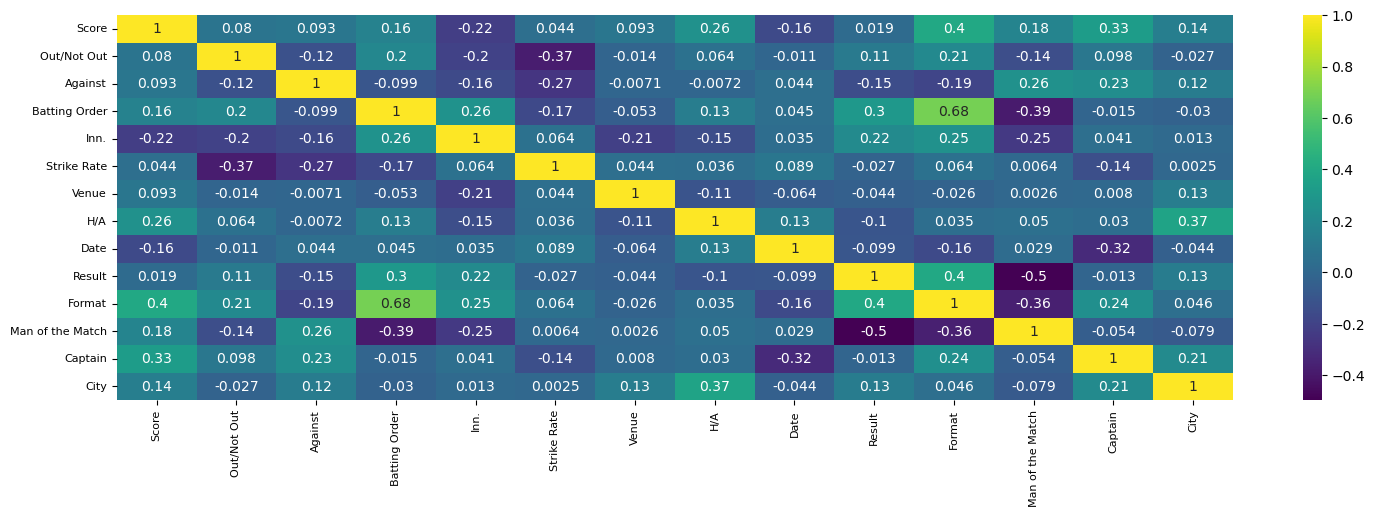

In [358]:
# Visualizing correlation of the dataset in heatmap

plt.figure(figsize=(18,5))
sns.heatmap(virat.corr(),annot=True,cmap='viridis')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

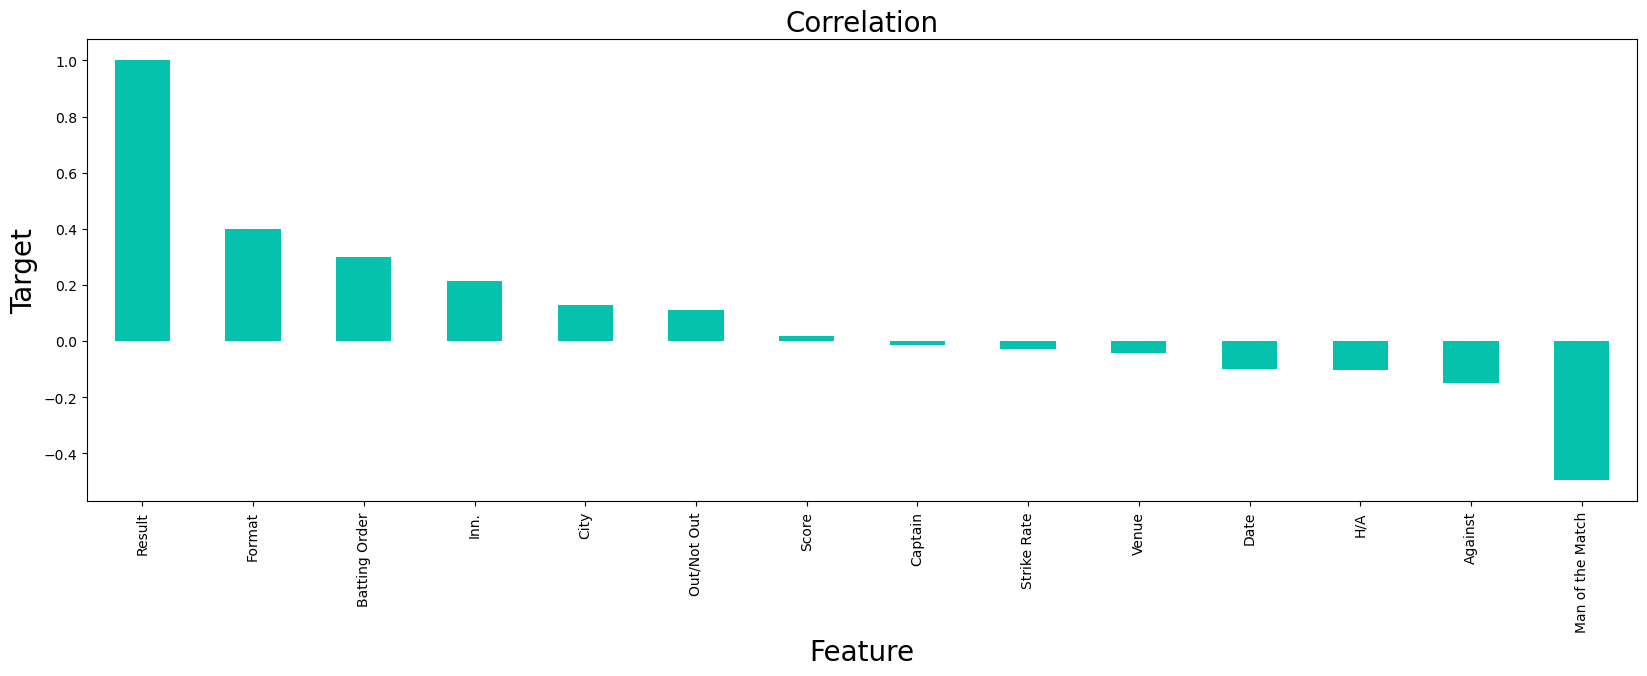

In [359]:
# Visualizing the correlation of the features with target variable 'Result'

plt.figure(figsize=(20,6))
virat.corr()['Result'].sort_values(ascending=False).plot(kind='bar',color='#06c2ac')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

In [360]:
virat_num

['Score', 'Batting Order', 'Inn.', 'Strike Rate']

# Outliers Treatment

In [361]:
from scipy.stats import zscore

col = ['Score', 'Batting Order', 'Inn.', 'Strike Rate']

z1 = virat[col]
z1.head(5)

,Score,Batting Order,Inn.,Strike Rate
0,116,6,2,114.019545
1,103,5,2,114.019545
2,103,5,2,114.019545
3,107,5,2,114.019545
4,119,4,1,114.019545


In [362]:
z = np.abs(zscore(z1))
threshold = 3
print(np.where(z>3))

(array([ 0,  5,  7, 19, 25, 42, 43, 70, 70], dtype=int64), array([1, 2, 2, 0, 0, 3, 3, 1, 3], dtype=int64))


In [363]:
virat_new = virat[(z<3).all(axis=1)]

In [364]:
virat.shape

(71, 14)

In [365]:
virat_new.shape

(63, 14)

In [366]:
# Data loss

data_loss = (71-63)/71*100
data_loss

11.267605633802818

In [367]:
# Checking skewness of the dataset

virat_new.skew()

Score               1.642472
Out/Not Out        -1.260039
Against            -0.131852
Batting Order       0.690238
Inn.                0.068211
Strike Rate         0.554045
Venue              -0.066438
H/A                 0.229098
Date               -0.060355
Result              1.508779
Format              0.648167
Man of the Match   -0.163143
Captain            -0.432133
City               -0.047746
dtype: float64

In [368]:
# Applying SQRT method to reduce skewness for the below features

virat_new['Score']= np.sqrt(virat_new['Score'])
virat_new['Batting Order']= np.sqrt(virat_new['Batting Order'])
virat_new['Inn.']= np.sqrt(virat_new['Inn.'])
virat_new['Strike Rate']= np.sqrt(virat_new['Strike Rate'])

In [369]:
# Checking skewness of the dataset

virat_new.skew()

Score               1.422446
Out/Not Out        -1.260039
Against            -0.131852
Batting Order       0.582855
Inn.               -0.181818
Strike Rate         0.307445
Venue              -0.066438
H/A                 0.229098
Date               -0.060355
Result              1.508779
Format              0.648167
Man of the Match   -0.163143
Captain            -0.432133
City               -0.047746
dtype: float64

In [370]:
# Removing skewness using power transform 

from sklearn.preprocessing import PowerTransformer

skew =['Batting Order','Strike Rate']


pt = PowerTransformer(method='yeo-johnson',standardize=False)
virat_new[skew] = pt.fit_transform(virat_new[skew].values)

In [371]:
# Checking skewness of the dataset

virat_new.skew()

Score               1.422446
Out/Not Out        -1.260039
Against            -0.131852
Batting Order       0.257809
Inn.               -0.181818
Strike Rate        -0.004154
Venue              -0.066438
H/A                 0.229098
Date               -0.060355
Result              1.508779
Format              0.648167
Man of the Match   -0.163143
Captain            -0.432133
City               -0.047746
dtype: float64

In [372]:
# Checking Variance inflation factor for the dataset 
# Splitting the target variable Result

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = virat_new.drop('Result',axis=1)
x.head(5)

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Venue,H/A,Date,Format,Man of the Match,Captain,City
1,10.148892,1,4,0.125393,1.414214,1.347829,19,1,68,2,1,0,1
2,10.148892,1,3,0.125393,1.414214,1.347829,42,1,23,2,0,0,30
3,10.344080,1,1,0.125393,1.414214,1.347829,18,1,49,2,0,0,7
4,10.908712,1,6,0.125384,1.000000,1.347829,43,0,41,2,0,0,23
6,10.723805,1,1,0.125384,1.414214,1.347829,3,0,16,2,0,1,0


In [373]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

      VIF Factor          Features
0     129.445395             Score
1       5.772195       Out/Not Out
2       5.547249           Against
3   13484.638422     Batting Order
4      47.088094              Inn.
5   14051.539870       Strike Rate
6       4.715857             Venue
7       2.557908               H/A
8       5.188138              Date
9       2.786441            Format
10      2.966727  Man of the Match
11      3.550959           Captain
12      5.090597              City


In [374]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m = ['Batting Order','Strike Rate','Score','Inn.']

st= StandardScaler()
x[m] = st.fit_transform(x[m].values)
x.sample(5)

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Venue,H/A,Date,Format,Man of the Match,Captain,City
61,0.023138,0,6,-0.911569,0.615219,1.811048,38,0,30,0,1,1,6
16,-0.932418,0,7,0.988361,2.052104,0.354113,10,0,60,2,0,1,15
3,-0.778138,1,1,1.765322,0.615219,0.354113,18,1,49,2,0,0,7
57,-0.259687,1,4,-0.911569,-1.257366,-1.148873,44,1,51,0,0,1,29
27,-0.778138,1,7,0.988361,0.615219,-1.438697,7,1,58,0,0,0,26


In [375]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor          Features
0     1.461242             Score
1     4.929337       Out/Not Out
2     5.008962           Against
3     4.233952     Batting Order
4     1.354518              Inn.
5     1.412758       Strike Rate
6     3.681473             Venue
7     2.639360               H/A
8     4.351996              Date
9     7.278010            Format
10    2.762501  Man of the Match
11    4.057271           Captain
12    4.969582              City


# Applying SMOTE

In [376]:
# checking the dimension of x
    
x.shape

(63, 13)

In [377]:
# Assigning target variable as y_2

y_2 = virat_new['Result']
y_2.shape

(63,)

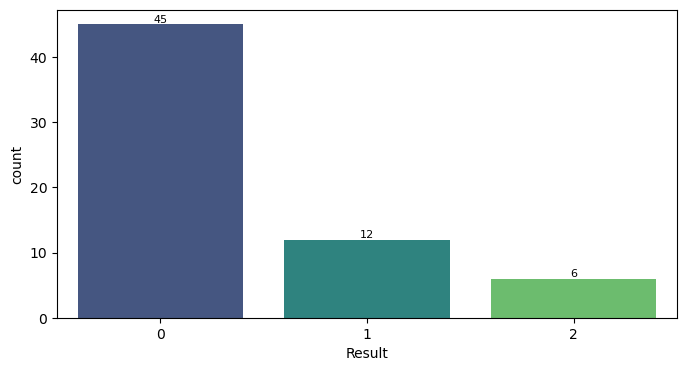

In [378]:
# Checking the count of feature 'Result' 

plt.figure(figsize=(8,4))
ct = sns.countplot(data = virat_new, x = y_2, palette='viridis')

for i in ct.containers:
    ct.bar_label(i,fontsize=8)

In [379]:
# Importing SMOTE from imblearn

from imblearn.over_sampling import SMOTE

In [381]:
# Applying SMOTE technique

smt = SMOTE()

x2,y2 = smt.fit_resample(x,y_2)

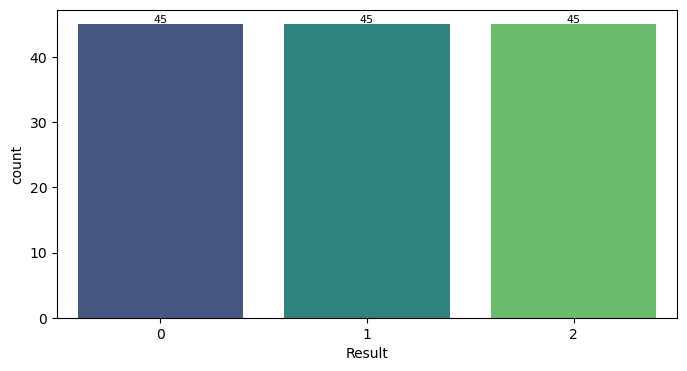

In [382]:
# Checking the count of feature 'Gross_Collection_$M' 

plt.figure(figsize=(8,4))
ct = sns.countplot(data = virat_new, x = y2, palette='viridis')

for i in ct.containers:
    ct.bar_label(i,fontsize=8)

# Model Evaluation

In [404]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [388]:
# Checking the dimension of the data 

x2.shape

(135, 13)

In [389]:
# Checking the dimension of the data 

y2.shape

(135,)

In [390]:
# Finding Random State

maxAcc = 0
maxRS = 0

for i in range(1,200):
    x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x2_train,y2_train)
    predrf = rf.predict(x2_test)
    acc = accuracy_score(y2_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 100.0 on Random State 120


In [391]:
# Training the Model with .30 as test size and random state at 120

x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30, random_state = 120)

In [392]:
GB = GaussianNB()
GB.fit(x2_train,y2_train)
print(GB.score(x2_train,y2_train))
GB_predict = GB.predict(x2_test)
cross_val_13 = cross_val_score(GB,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,GB_predict)*100)
print('CV score of GaussianNB:',cross_val_13.mean()*100)
print(confusion_matrix(y2_test,GB_predict))
print(classification_report(y2_test,GB_predict))

0.7659574468085106
Accuracy Score: 82.92682926829268
CV score of GaussianNB: 74.81481481481482
[[14  0  0]
 [ 0 16  0]
 [ 2  5  4]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.76      1.00      0.86        16
           2       1.00      0.36      0.53        11

    accuracy                           0.83        41
   macro avg       0.88      0.79      0.78        41
weighted avg       0.86      0.83      0.80        41



In [393]:
LR = LogisticRegression()
LR.fit(x2_train,y2_train)
print(LR.score(x2_train,y2_train))
LR_predict = LR.predict(x2_test)
cross_val_14 = cross_val_score(LR,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,LR_predict)*100)
print('CV score of LogisticRegression:',cross_val_14.mean()*100)
print(confusion_matrix(y2_test,LR_predict))
print(classification_report(y2_test,LR_predict))

0.9148936170212766
Accuracy Score: 85.36585365853658
CV score of LogisticRegression: 85.92592592592592
[[11  1  2]
 [ 3 13  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.93      0.81      0.87        16
           2       0.85      1.00      0.92        11

    accuracy                           0.85        41
   macro avg       0.85      0.87      0.86        41
weighted avg       0.86      0.85      0.85        41



In [394]:
svc = SVC(probability=True)
svc.fit(x2_train,y2_train)
print(svc.score(x2_train,y2_train))
svc_predict = svc.predict(x2_test)
cross_val_15 = cross_val_score(svc,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,svc_predict)*100)
print('CV score of Support Vector Classifier:',cross_val_15.mean()*100)
print(confusion_matrix(y2_test,svc_predict))
print(classification_report(y2_test,svc_predict))

0.5638297872340425
Accuracy Score: 58.536585365853654
CV score of Support Vector Classifier: 57.777777777777786
[[ 5  4  5]
 [ 3  8  5]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        14
           1       0.67      0.50      0.57        16
           2       0.52      1.00      0.69        11

    accuracy                           0.59        41
   macro avg       0.61      0.62      0.57        41
weighted avg       0.61      0.59      0.56        41



In [395]:
KNC = KNeighborsClassifier()
KNC.fit(x2_train,y2_train)
print(KNC.score(x2_train,y2_train))
KNC_predict = KNC.predict(x2_test)
cross_val_16 = cross_val_score(KNC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,KNC_predict)*100)
print('CV score of K Neighbors Classifier:',cross_val_16.mean()*100)
print(confusion_matrix(y2_test,KNC_predict))
print(classification_report(y2_test,KNC_predict))

0.7978723404255319
Accuracy Score: 68.29268292682927
CV score of K Neighbors Classifier: 71.11111111111111
[[ 9  2  3]
 [ 3 10  3]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.71      0.62      0.67        16
           2       0.60      0.82      0.69        11

    accuracy                           0.68        41
   macro avg       0.69      0.70      0.68        41
weighted avg       0.70      0.68      0.68        41



In [396]:
DTC = DecisionTreeClassifier()
DTC.fit(x2_train,y2_train)
print(DTC.score(x2_train,y2_train))
DTC_predict = DTC.predict(x2_test)
cross_val_17 = cross_val_score(DTC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,DTC_predict)*100)
print('CV score of Decision Tree Classifier:',cross_val_17.mean()*100)
print(confusion_matrix(y2_test,DTC_predict))
print(classification_report(y2_test,DTC_predict))

1.0
Accuracy Score: 95.1219512195122
CV score of Decision Tree Classifier: 89.62962962962962
[[12  0  2]
 [ 0 16  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       1.00      1.00      1.00        16
           2       0.85      1.00      0.92        11

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.96      0.95      0.95        41



In [397]:
RFC = RandomForestClassifier()
RFC.fit(x2_train,y2_train)
print(RFC.score(x2_train,y2_train))
RFC_predict = RFC.predict(x2_test)
cross_val_18 = cross_val_score(RFC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,RFC_predict)*100)
print('CV score of Random Forest Classifier:',cross_val_18.mean()*100)
print(confusion_matrix(y2_test,RFC_predict))
print(classification_report(y2_test,RFC_predict))

1.0
Accuracy Score: 97.5609756097561
CV score of Random Forest Classifier: 90.37037037037038
[[13  0  1]
 [ 0 16  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      1.00      1.00        16
           2       0.92      1.00      0.96        11

    accuracy                           0.98        41
   macro avg       0.97      0.98      0.97        41
weighted avg       0.98      0.98      0.98        41



In [398]:
ETC = ExtraTreeClassifier()
ETC.fit(x2_train,y2_train)
print(ETC.score(x2_train,y2_train))
ETC_predict = ETC.predict(x2_test)
cross_val_19 = cross_val_score(ETC,x2,y2,cv=5)


print('Accuracy Score:',accuracy_score(y2_test,ETC_predict)*100)
print('CV score of Extra Tree Classifier:',cross_val_19.mean()*100)
print(confusion_matrix(y2_test,ETC_predict))
print(classification_report(y2_test,ETC_predict))

1.0
Accuracy Score: 90.2439024390244
CV score of Extra Tree Classifier: 86.66666666666666
[[13  0  1]
 [ 1 13  2]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       1.00      0.81      0.90        16
           2       0.79      1.00      0.88        11

    accuracy                           0.90        41
   macro avg       0.90      0.91      0.90        41
weighted avg       0.92      0.90      0.90        41



In [399]:
GBC = GradientBoostingClassifier()
GBC.fit(x2_train,y2_train)
print(GBC.score(x2_train,y2_train))
GBC_predict = GBC.predict(x2_test)
cross_val_20 = cross_val_score(GBC,x2,y2,cv=5)


print('Accuracy Score:',accuracy_score(y2_test,GBC_predict)*100)
print('CV score of Gradient Boosting Classifier:',cross_val_20.mean()*100)
print(confusion_matrix(y2_test,GBC_predict))
print(classification_report(y2_test,GBC_predict))

1.0
Accuracy Score: 100.0
CV score of Gradient Boosting Classifier: 91.11111111111111
[[14  0  0]
 [ 0 16  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        11

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [400]:
ABC = AdaBoostClassifier()
ABC.fit(x2_train,y2_train)
print(ABC.score(x2_train,y2_train))
ABC_predict = ABC.predict(x2_test)
cross_val_21 = cross_val_score(ABC,x2,y2,cv=5)


print('Accuracy Score:',accuracy_score(y2_test,ABC_predict)*100)
print('CV score of Ada Boost Classifier:',cross_val_21.mean()*100)
print(confusion_matrix(y2_test,ABC_predict))
print(classification_report(y2_test,ABC_predict))

0.9361702127659575
Accuracy Score: 80.48780487804879
CV score of Ada Boost Classifier: 82.96296296296296
[[13  0  1]
 [ 2 12  2]
 [ 3  0  8]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        14
           1       1.00      0.75      0.86        16
           2       0.73      0.73      0.73        11

    accuracy                           0.80        41
   macro avg       0.82      0.80      0.80        41
weighted avg       0.83      0.80      0.81        41



In [401]:
BC = BaggingClassifier()
BC.fit(x2_train,y2_train)
print(BC.score(x2_train,y2_train))
BC_predict = BC.predict(x2_test)
cross_val_22 = cross_val_score(BC,x2,y2,cv=5)


print('Accuracy Score:',accuracy_score(y2_test,BC_predict)*100)
print('CV score of Bagging Classifier:',cross_val_22.mean()*100)
print(confusion_matrix(y2_test,BC_predict))
print(classification_report(y2_test,BC_predict))

1.0
Accuracy Score: 97.5609756097561
CV score of Bagging Classifier: 91.11111111111111
[[14  0  0]
 [ 0 15  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

    accuracy                           0.98        41
   macro avg       0.97      0.98      0.97        41
weighted avg       0.98      0.98      0.98        41



GaussianNB() 0.9925595238095237
LogisticRegression() 0.9781520562770561
RandomForestClassifier() 1.0
ExtraTreeClassifier() 0.9352678571428572
DecisionTreeClassifier() 0.9642857142857143
KNeighborsClassifier() 0.8548430735930737
GradientBoostingClassifier() 1.0
AdaBoostClassifier() 0.9419642857142856
BaggingClassifier() 0.9968208874458874
SVC(probability=True) 0.8475378787878788


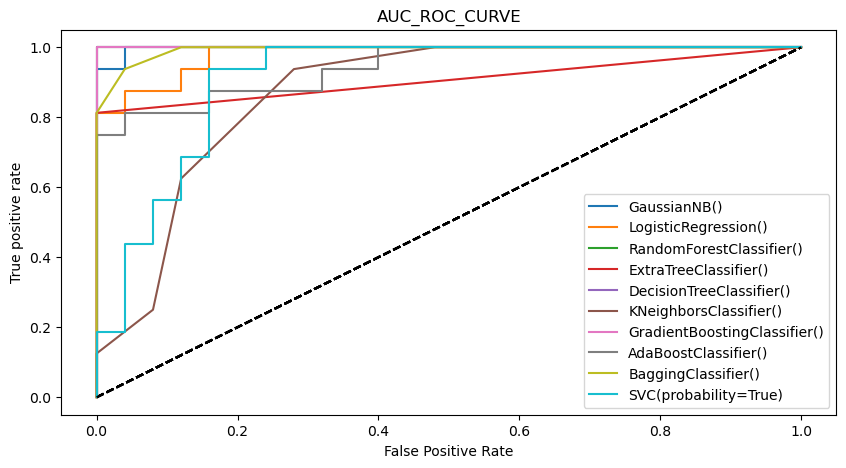

In [402]:
# AUC_ROC_CURVE - Area under the Curve Receiver Operating Characteristic

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

model = [GB,LR,RFC,ETC,DTC,KNC,GBC,ABC,BC,svc]
auc=[]


plt.figure(figsize=(10,5))
for i in model:
    y_pred_prob = i.predict_proba(x2_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
    plt.plot(fpr,tpr,label=i )
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive rate')
    plt.title('AUC_ROC_CURVE')
    plt.legend()


    auc_score = roc_auc_score(y2_test,i.predict_proba(x2_test),multi_class= 'ovo')
    auc.append(auc_score)
    print(i,auc_score)
plt.show()

# Hyper Parameter Tuning for GradientBoostingClassifier

In [415]:
# Grid SearchCV for GradientBoostingClassifier

grid_params = {'loss': ['log_loss', 'deviance', 'exponential'],
              "n_estimators": [50,100,150,200],'criterion': ['friedman_mse', 'squared_error'],
              'min_samples_leaf': [1, 2],
              "min_samples_split" : [2,4,5,6]}
            
            
gs = GridSearchCV(GradientBoostingClassifier(), param_grid = grid_params_4)

g_res = gs.fit(x2_train,y2_train)

print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

Best Score 0.8836257309941521
Best Params {'criterion': 'squared_error', 'loss': 'deviance', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}


In [420]:
# Applying parameters to GradientBoostingClassifier

Final_Model = GradientBoostingClassifier(loss ='deviance',criterion ='squared_error',min_samples_leaf = 1,
                                      min_samples_split=6, n_estimators=100)
                                       
Final_Model.fit(x2_train,y2_train)
model_prediction = Final_Model.predict(x2_test)
print(Final_Model.score(x2_train,y2_train))
cross_val_final = cross_val_score(Final_Model,x2,y2,cv=5)

print('Accuracy_score',accuracy_score(y2_test,model_prediction)*100)
print('CV score of GradientBoostingClassifier:',cross_val_final.mean()*100)
print(confusion_matrix(y2_test,model_prediction))
print(classification_report(y2_test,model_prediction))

1.0
Accuracy_score 100.0
CV score of GradientBoostingClassifier: 90.37037037037038
[[14  0  0]
 [ 0 16  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        11

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [421]:
# Saving the model using .pkl

import joblib

joblib.dump(Final_Model,"Virat_Kohli_Match_Pred.pkl")

['Virat_Kohli_Match_Pred.pkl']

In [422]:
# Loading the saved model

Result_class = joblib.load("Virat_Kohli_Match_Pred.pkl")

#Prediction
prediction_2 = Result_class.predict(x2_test)
prediction_2

array([1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0],
      dtype=int64)

In [423]:
pd.set_option('display.max_rows',None)
pd.DataFrame([Result_class.predict(x2_test)[:],y2_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,2,2
4,1,1
5,1,1
6,1,1
7,2,2
8,0,0
9,0,0


# Conclusion
    
Concluding Gradient Boosting Classifier as the best fit Model based on below scores after Hyper Parameter Tuning

Accuracy_score 100.0%

CV score of RandomForestClassifier: 90.34%

AUC_Score : 100%